In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 평균 제곱 오차
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [4]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# log(0)은 inf기 때문에 임의의 작은 값 delta를 더함

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [7]:
train_size = x_train.shape[0]
print("train_size: ", train_size)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(len(x_batch))
print(len(t_batch))

train_size:  60000
[51852  7468 25842  9581 47999 56952 57235 50168  7848   710]
10
10


In [8]:
#배치용 교차 엔트로피 구현
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+ 1e-7)) / batch_size

In [9]:
# 원 핫 인코딩이 아닌 숫자 레이블로 주어졌을 때 엔트로피 오차
def cross_entropy_error(y,t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수지해석

In [10]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [11]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

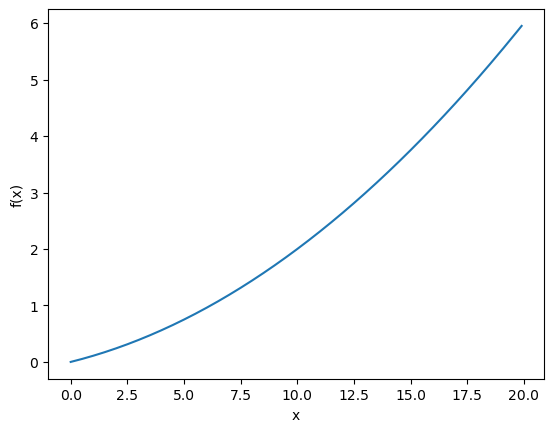

In [12]:

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [13]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [14]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [15]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [16]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [17]:
#학습률이 너무 큰 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x =init_x, lr=10.0, step_num =100)

array([-2.58983747e+13, -1.29524862e+12])

In [18]:
# 학습률이 너무 작은 경우
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x =init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 신경망에서의 기울기

In [19]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [20]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    

In [21]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


[[ 0.78133681  0.3657992  -1.95459858]
 [-0.44369265  0.06322558  1.23157212]]
[ 0.0694787   0.27638255 -0.06434424]


In [22]:
np.argmax(p)

1

In [23]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.2667104424913134

In [24]:
def f(W):
    return net.loss(x, t)

In [25]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19326097  0.23768477 -0.43094573]
 [ 0.28989145  0.35652715 -0.6464186 ]]


In [26]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.19326097  0.23768477 -0.43094573]
 [ 0.28989145  0.35652715 -0.6464186 ]]


### 학습 알고리즘 구현하기
<br>
1단계 - 미니배치<br>
    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다.<br>
2단계 - 기울기 산출<br>
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다.<br>
3단계 - 배개변수 갱신<br>
    가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.<br>
4단계 - 반복<br>
    1~3단계를 반복한다<br>

In [27]:
# 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params["W1"])
        grads['b1'] = numerical_gradient(loss_W, self.params["b1"])
        grads['W2'] = numerical_gradient(loss_W, self.params["W2"])
        grads['b2'] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads
    

In [28]:
net = TwoLayerNet(input_size = 784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [29]:
x = np.random.rand(100, 784)
print(x.shape)
y = net.predict(x)
print(y)

(100, 784)
[[0.09173102 0.10093634 0.10937182 0.10273877 0.10222647 0.09898516
  0.1003406  0.09593802 0.1002973  0.0974345 ]
 [0.09178429 0.10079243 0.10960543 0.10259877 0.10253231 0.09893322
  0.10032441 0.09618335 0.10061178 0.096634  ]
 [0.09183511 0.10094106 0.10982765 0.10285821 0.10174276 0.09924425
  0.10034772 0.09577355 0.10053357 0.09689612]
 [0.09190998 0.10093769 0.10943357 0.10265988 0.10216769 0.09867457
  0.10053121 0.09621822 0.10070043 0.09676676]
 [0.09168685 0.10117256 0.1093429  0.10261806 0.10275826 0.09886493
  0.10022967 0.0959459  0.10025548 0.0971254 ]
 [0.09204183 0.1012048  0.10990051 0.10245012 0.10207908 0.09858001
  0.10028877 0.09581414 0.1007346  0.09690614]
 [0.09166442 0.10104282 0.10917174 0.10263493 0.10247291 0.09921692
  0.10033897 0.09598252 0.10038906 0.09708571]
 [0.09181155 0.10109769 0.10983135 0.10256309 0.10175401 0.09912854
  0.10041934 0.09595876 0.100585   0.09685067]
 [0.09172554 0.10112307 0.10941961 0.10268197 0.10206169 0.09888724
 

In [30]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [31]:
# 미니배치 학습 구현
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


In [32]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    
    x_batch = x_train[batch_mask]
    t_batch = x_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

IndexError: arrays used as indices must be of integer (or boolean) type